# Python Beginner Workshop 2

### 2.1 Quick overview of modules in Python
> Modules are groups of classes and functions. When we import a module, we can use these classes and functions in our code. The following snippets show how to import and use functions and classes inside a module.
> For instance, the *numpy* module offers powerful N-dimensional array object, linear algebra operations and Fourier transforms.

In [20]:
import time # time is a module

time.asctime() # we call the function asctime from the time module
    # by writing the module following by a point before the 
    # function we want to use. 

'Tue Jun 25 22:14:49 2019'

In [21]:
import numpy as np # we can rename the module with the "as" keyword.
    # Then, we refer to numpy as np in our code
    
np.linspace(0.1, 10) # same case as in our previous cell, except that
    # now we wrote np instead of numpy before the dot and our function.

array([ 0.1       ,  0.30204082,  0.50408163,  0.70612245,  0.90816327,
        1.11020408,  1.3122449 ,  1.51428571,  1.71632653,  1.91836735,
        2.12040816,  2.32244898,  2.5244898 ,  2.72653061,  2.92857143,
        3.13061224,  3.33265306,  3.53469388,  3.73673469,  3.93877551,
        4.14081633,  4.34285714,  4.54489796,  4.74693878,  4.94897959,
        5.15102041,  5.35306122,  5.55510204,  5.75714286,  5.95918367,
        6.16122449,  6.36326531,  6.56530612,  6.76734694,  6.96938776,
        7.17142857,  7.37346939,  7.5755102 ,  7.77755102,  7.97959184,
        8.18163265,  8.38367347,  8.58571429,  8.7877551 ,  8.98979592,
        9.19183673,  9.39387755,  9.59591837,  9.79795918, 10.        ])

In [22]:
from numpy import array # we can also directly import one or few functions
    # or classes from a module using the import keyworkd.
    

array([1,2,3,4]) # because we directly imported the array class from the 
    # numpy module using the import keyword, we don't have to write 
    # the module name followed by a dot.


array([1, 2, 3, 4])

### 2.2 Opening folders and understanding where you files are on your disk in Python.
> The $os$ module allows you to access your filesystem and to intereact with files on your disk. The $os$ module works independently of your operating system. Using this module, we can open files stored in different folders.

In [23]:
import os
os.getcwd() # shows the current working directory

'C:\\Users\\mystery\\Documents\\python_tutorials'

In [24]:
os.listdir() # shows the files in your current directory

['.ipynb_checkpoints',
 'answers_1.ipynb',
 'answers_2.ipynb',
 'beginner_workshop2.ipynb',
 'beginner_workshop_1.ipynb',
 'requirements.txt',
 'solutionnaire2.ipynb',
 'solutionnaire_1.ipynb',
 'starWarsClean.csv',
 'tutoriel_débutant2.ipynb',
 'tutoriel_débutant_1.ipynb']

> A usual situation is having to open a file in a specific folder. In our case, we want to open the file "starWarsClean.csv" which you can download [here](https://drive.google.com/file/d/1XNGKtLzBacQaaP7PgPgyfBHc3Ux1nl2w/view?usp=sharing). I assume that your file is in your download folder after you've downloaded it. This folder is probably somwhere like this,  
![path](https://i.ibb.co/kS9XkKR/image.png)  
Note that Windows use backslashes (\). On the other hand, Linux and Mac uses forward slashes (/). So we would write our path like this:

In [25]:
PATH = "C:\\Users\\mystery\\Downloads" # on windows, we have to double backslashes
filename = "starWarsClean.csv"

os.path.join(PATH, filename) # os path join deals automatically with slashes

'C:\\Users\\mystery\\Downloads\\starWarsClean.csv'

> Now that we have access to files anywhere on our computer, we will open the star wars dataset.

### 2.3 Pandas DataFrame
> The pandas module offers a tremendous amount of functionalities for python developers dealing with datasets. DataFrames are important components of the pandas module which represent a data type with rows and columns. Rows are internally represented as index. Both rows and columns have names. We can directly open a csv using the pandas module such that it is mapped to a DataFrame.

In [26]:
import pandas as pd

# open the file "starWarsClean.csv"
star_wars_data = pd.read_csv(os.path.join(PATH, filename))
'''
import io
from google.colab import files
uploaded = files.upload()
star_wars_data = pd.read_csv(io.StringIO(uploaded['starWarsClean.csv'].decode()))
'''

star_wars_data.head() # head() returns the 5 first rows by default

,id,Seen_StarWars,Fan,Han_Solo,Luke_Skywalker,Princess.Leia,Anakin.Skywalker,Obi_Wan,Emperor_Palpatine,Darth_Vader,...,C3P0,R2D2,Jar_Jar_Binks,Padme_Amidala,Yoda,Who_shot_first,Gender,Age,Household_Income,Education
0,3292879998,Yes,Yes,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,...,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Male,24.0,NaN,High school degree
1,3292879538,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Male,25.0,"$0 - $24,999",Bachelor degree
2,3292765271,Yes,No,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),...,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,Male,29.0,"$0 - $24,999",High school degree
3,3292763116,Yes,Yes,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,...,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Male,23.0,"$100,000 - $149,999",Some college or Associate degree
4,3292731220,Yes,Yes,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very unfavorably,Somewhat favorably,...,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat favorably,Somewhat favorably,Greedo,Male,29.0,"$100,000 - $149,999",Some college or Associate degree


#### 2.3.1 The different ways of retrieving data from a DataFrame
> In the previous cell, we used the head() function which automatically returns the 5 first rows of our DataFrame. However, we might want to access other rows or elements of our DataFrame. The two main ways of doing so are the function *loc* and *iloc*. These functions use the _slicing_ and _indexing_ capabilities that we looked at previously.  
> The *iloc* function is used to access our data with indices (numerical inputs) while the *loc* function is used to access our dataset with the name of our rows and columns.

In [27]:
# iloc use numerical inputs
star_wars_data.iloc[0] # returns the first row

id                                         3292879998
Seen_StarWars                                     Yes
Fan                                               Yes
Han_Solo                               Very favorably
Luke_Skywalker                         Very favorably
Princess.Leia                          Very favorably
Anakin.Skywalker                       Very favorably
Obi_Wan                                Very favorably
Emperor_Palpatine                      Very favorably
Darth_Vader                            Very favorably
Lando_Calrissian                     Unfamiliar (N/A)
Boba.Fett                            Unfamiliar (N/A)
C3P0                                   Very favorably
R2D2                                   Very favorably
Jar_Jar_Binks                          Very favorably
Padme_Amidala                          Very favorably
Yoda                                   Very favorably
Who_shot_first       I don't understand this question
Gender                      

In [28]:
# iloc can return multiple rows at once if you give it a list as input
star_wars_data.iloc[[0,2,3]] # returns the first, third and fourth rows

,id,Seen_StarWars,Fan,Han_Solo,Luke_Skywalker,Princess.Leia,Anakin.Skywalker,Obi_Wan,Emperor_Palpatine,Darth_Vader,...,C3P0,R2D2,Jar_Jar_Binks,Padme_Amidala,Yoda,Who_shot_first,Gender,Age,Household_Income,Education
0,3292879998,Yes,Yes,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,...,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Male,24.0,NaN,High school degree
2,3292765271,Yes,No,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),...,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,Male,29.0,"$0 - $24,999",High school degree
3,3292763116,Yes,Yes,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,...,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Male,23.0,"$100,000 - $149,999",Some college or Associate degree


In [29]:
# we can slice a DataFrame using iloc
star_wars_data.iloc[:5] # returns the first 5 rows just like the head function

,id,Seen_StarWars,Fan,Han_Solo,Luke_Skywalker,Princess.Leia,Anakin.Skywalker,Obi_Wan,Emperor_Palpatine,Darth_Vader,...,C3P0,R2D2,Jar_Jar_Binks,Padme_Amidala,Yoda,Who_shot_first,Gender,Age,Household_Income,Education
0,3292879998,Yes,Yes,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,...,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Male,24.0,NaN,High school degree
1,3292879538,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Male,25.0,"$0 - $24,999",Bachelor degree
2,3292765271,Yes,No,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),...,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,Male,29.0,"$0 - $24,999",High school degree
3,3292763116,Yes,Yes,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,...,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Male,23.0,"$100,000 - $149,999",Some college or Associate degree
4,3292731220,Yes,Yes,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very unfavorably,Somewhat favorably,...,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat favorably,Somewhat favorably,Greedo,Male,29.0,"$100,000 - $149,999",Some college or Associate degree


In [30]:
# iloc can be used to return a subset of columns (here we specify we want the 2 first columns - after the comma)
star_wars_data.iloc[:5, :2] # returns the 2 first columns of the first 5 rows

,id,Seen_StarWars
0,3292879998,Yes
1,3292879538,No
2,3292765271,Yes
3,3292763116,Yes
4,3292731220,Yes


In the previous example
```
star_wars_data.iloc[:5, :2]
```
Notice the comma, it splits the rows from the columns. The following line
```
star_wars_data.iloc[:, :]
```
returns all data in our DataFrame (the complete DataFrame). While the following line
```
star_wars_data.iloc[0:1, 0:1]
```
returns only a DataFrame consisting of the very first element. (first row and fist column)


In [31]:
star_wars_data.iloc[0:1, 0:1]

,id
0,3292879998


In [32]:
type(star_wars_data.iloc[0:1, 0:1]) # in fact this is a DataFrame, and now a number

pandas.core.frame.DataFrame

In [33]:
# using lists as input
star_wars_data.iloc[[0,1,3], [4, 5]]

,Luke_Skywalker,Princess.Leia
0,Very favorably,Very favorably
1,NaN,NaN
3,Very favorably,Very favorably


> *loc* works with text data. We use the columns and rows name to access the DataFram when using the *loc* function.

In [34]:
star_wars_data.loc[[0, 1, 2]] # in fact, our rows' name are number so same as iloc in this specific instance

,id,Seen_StarWars,Fan,Han_Solo,Luke_Skywalker,Princess.Leia,Anakin.Skywalker,Obi_Wan,Emperor_Palpatine,Darth_Vader,...,C3P0,R2D2,Jar_Jar_Binks,Padme_Amidala,Yoda,Who_shot_first,Gender,Age,Household_Income,Education
0,3292879998,Yes,Yes,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,...,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Male,24.0,NaN,High school degree
1,3292879538,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Male,25.0,"$0 - $24,999",Bachelor degree
2,3292765271,Yes,No,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),...,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,Male,29.0,"$0 - $24,999",High school degree


In [35]:
star_wars_data.loc[:5, ['Fan', 'Princess.Leia']] # 5 first rows and only 2 columns

,Fan,Princess.Leia
0,Yes,Very favorably
1,NaN,NaN
2,No,Somewhat favorably
3,Yes,Very favorably
4,Yes,Somewhat favorably
5,Yes,Very favorably


#### Exercise 1
> Display the *education* of the third person in our DataFrame using the _loc_ function.

In [36]:
def exercice1(df):
  x = None # modify this variable, you can assign other variables
  return x

assert exercice1(star_wars_data) == 'High school degree'

AssertionError: 

#### Exercise 2
> Display the *Household_Income* of all the people in our DataFrame using the _loc_ function.

In [37]:
def exercice2(df):
    x = None
    return x

assert exercice2(star_wars_data).equals(pd.read_csv('starWarsClean.csv', usecols=['Household_Income']))

AttributeError: 'NoneType' object has no attribute 'equals'

### 2.4 Visualisation with the pandas DataFrame
> Pandas DataFrame allows us to directly plot datasets in different ways. We can use the _plot_ function directly on a DataFrame. However, to plot, we need to import the *matplotlib* module. *matplotlib* is frequently use for visualisation purposes and can also be used on other data types than pandas DataFrame such as lists or numpy arrays.

In [38]:
import matplotlib.pyplot as plt
import matplotlib
plt.close('all')

In [39]:
star_wars_data.loc[:, 'Han_Solo'].value_counts()

Very favorably                                 608
Somewhat favorably                             151
Neither favorably nor unfavorably (neutral)     44
Unfamiliar (N/A)                                15
Somewhat unfavorably                             8
Very unfavorably                                 1
Name: Han_Solo, dtype: int64

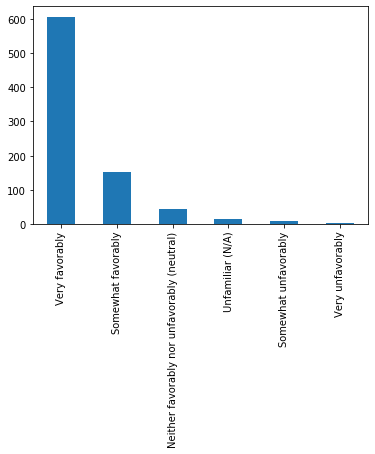

In [40]:
star_wars_data.loc[:, 'Han_Solo'].value_counts().plot(kind='bar')

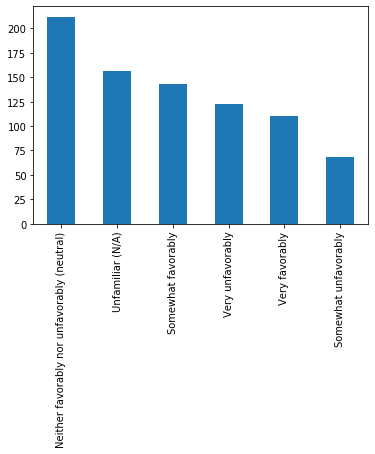

In [41]:
star_wars_data.loc[:, 'Emperor_Palpatine'].value_counts().plot(kind='bar')

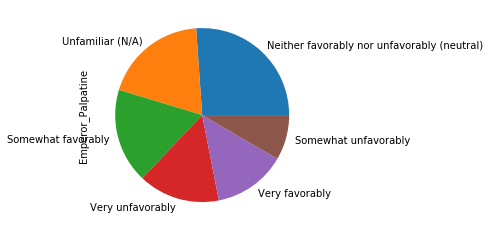

In [42]:
star_wars_data.loc[:, 'Emperor_Palpatine'].value_counts().plot(kind='pie')

> We will artificially construct a fake dataset in order to use different type of graphs than the ones we previously used which were for categorical data. We could use a real dataset, but we will generate a random one here for simplicity using the *randn* function.

In [43]:
import numpy as np
# 1000 data points
x = np.random.randn(1000)
y = pd.date_range('1/1/2019', periods=1000)
df = pd.DataFrame(data=x, index=y)
# we can change columns' name
df.columns = ['Value']
df.head()

,Value
2019-01-01,0.191860
2019-01-02,-0.648649
2019-01-03,-0.285080
2019-01-04,-1.381078
2019-01-05,-1.186301


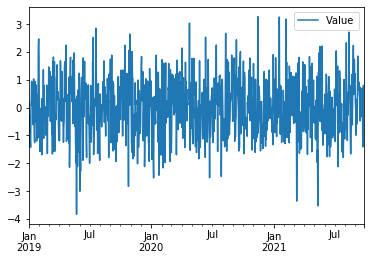

In [44]:
df.plot()

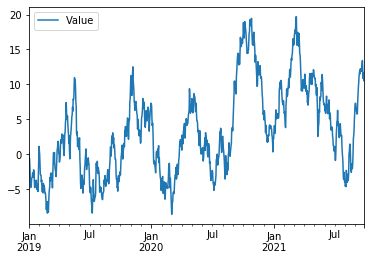

In [45]:
df = df.cumsum() # cumulative sum over our data
df.plot()

### 2.4 More possibilities with matplotlib.pyplot
> We have seen how to display simple plots directly from a DataFrame. However, while efficient, this method is very limited. We have a lot more options when using *matplotlib* _subplots_ and figures directly. *matplotlib*'s advantages per Wikipedia are the following:
* You can export in many formats (PNG, JPEG, PDF, SVG ...)
* There is a lot of easily accessible documentation on the web
* The community is very active
* Pylab can reproduce the MATLAB syntax
* high level module which is ideal for interactive computations  

> There exists other visualisations packages in Python sush as *plotly* and *seaborn*.  
Now, we can modify our figures by adding labels, titles, a legend and modify the size of our plots

Text(0.5, 1.0, 'My Graph')

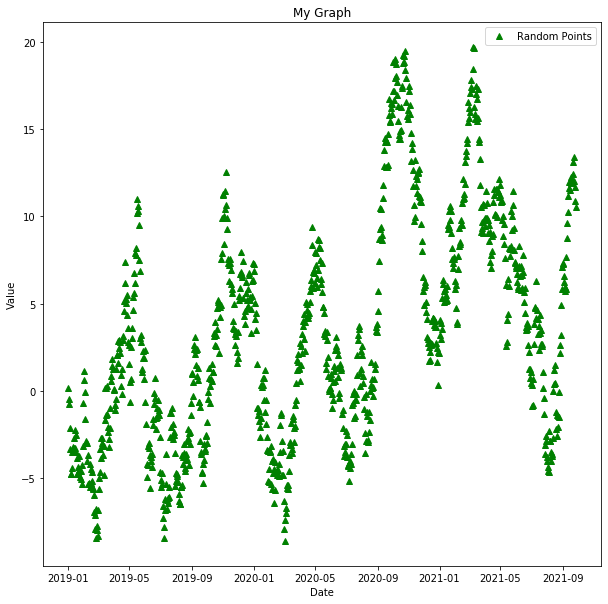

In [46]:
plt.figure(figsize=(10,10)) # modify the size of our plot
                # default size is 6.4 * 6.4 inches
plt.plot(df, 'g^')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend(['Random Points'])
plt.title('My Graph')

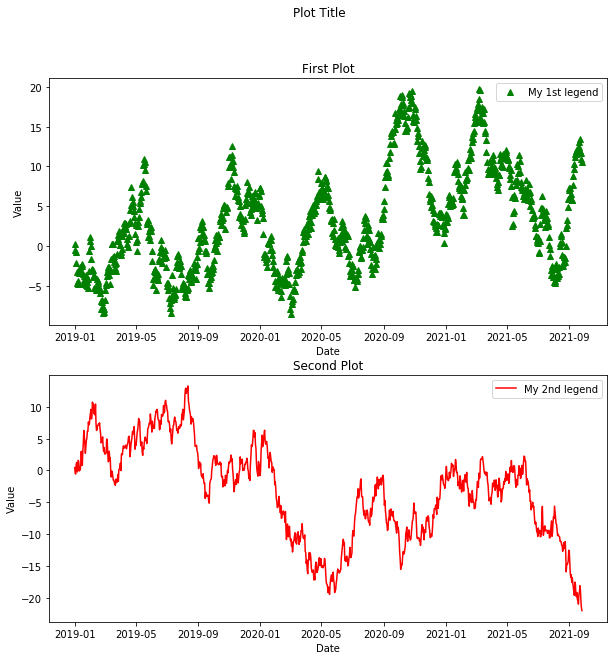

In [47]:
# let's create another fake random dataset to illustrate 2 datasets together
x2 = np.random.randn(1000) # 1000 points
df2 = pd.DataFrame(data=x2, index=y) # index being the x axis being the dates from earlier
df2 = df2.cumsum() # computing the cumulative sum over our dataset

figure, axes = plt.subplots(2, 1, figsize=(10,10)) # 2 * 1 images with this specified size.
# the title of our plots
figure.suptitle('Plot Title')

# axes represent a subgraph in our figure 
ax1 = axes[0]
ax2 = axes[1]

# the data from the first DataFrame will be in green
ax1.plot(df, 'g^')

# the data from our second DataFrame will be in red
ax2.plot(df2, 'r-')


# subgraphs' titles
ax1.set_title('First Plot')
ax2.set_title('Second Plot')

# setting the x labels
ax1.set_xlabel('Date')
ax2.set_xlabel('Date')

ax1.set_ylabel('Value')
ax2.set_ylabel('Value')

# let's display some legends
ax1.legend(['My 1st legend'])
ax2.legend(['My 2nd legend'])



### Descriptive statistics using pandas Dataframe
> We can directly generate a description of our dataset when our dataset is in the DataFrame format. By default, a description will only target numerical data types. 

In [48]:
star_wars_data.describe()

,id,Age
count,1.184000e+03,1044.000000
mean,3.290131e+09,47.591954
std,1.054059e+06,18.205395
min,3.288375e+09,18.000000
25%,3.289457e+09,33.000000
50%,3.290149e+09,46.000000
75%,3.290816e+09,60.000000
max,3.292880e+09,85.000000


In [49]:
# we can also describe other data types with the include list having the 'object' value
include = ['object', 'float', 'int']
star_wars_data.describe(include=include)

,Seen_StarWars,Fan,Han_Solo,Luke_Skywalker,Princess.Leia,Anakin.Skywalker,Obi_Wan,Emperor_Palpatine,Darth_Vader,Lando_Calrissian,...,C3P0,R2D2,Jar_Jar_Binks,Padme_Amidala,Yoda,Who_shot_first,Gender,Age,Household_Income,Education
count,1184,834,827,829,829,821,823,812,824,818,...,825,828,819,812,824,826,1044,1044.000000,856,1034
unique,2,2,6,6,6,6,6,6,6,6,...,6,6,6,6,6,3,2,NaN,5,5
top,Yes,Yes,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Neither favorably nor unfavorably (neutral),Very favorably,Neither favorably nor unfavorably (neutral),...,Very favorably,Very favorably,Very unfavorably,Neither favorably nor unfavorably (neutral),Very favorably,Han,Female,NaN,"$50,000 - $99,999",Some college or Associate degree
freq,934,551,608,551,545,269,589,212,308,236,...,474,562,203,206,604,324,547,NaN,297,327
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.591954,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.205395,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.000000,NaN,NaN


#### Exercise 3
> Reproduce the following figure:  
![pomm](https://i.ibb.co/0rYWbhq/image.png)  
Such that the figure's sizeis 9 by 9 inches, the data points are represented as circles, their color is yellow and we see the same information (axes, legend ...) describing the figure. Take the *df* dataset. Evidently, your figure will look different as our dataset is randomly generated each time.